# Exploring DBSCAN with Arbitrary Parameters Using Synthetic Data

In this lab, we will experiment with the DBSCAN clustering algorithm using different parameter values (`eps` and `min_samples`) on a synthetic dataset with 5 features. We will evaluate the performance of DBSCAN and visualize the clustering results.

The task is divided into three parts:

---

## a) Apply DBSCAN with Different Parameter Values

We will apply the DBSCAN algorithm with different values for the parameters `eps` (the maximum distance between two samples to be considered as neighbors) and `min_samples` (the number of samples in a neighborhood for a point to be considered a core point). We will experiment with various combinations of these parameters on a synthetic dataset created using `make_blobs` with 5 features and 3 centers (clusters). The goal is to observe how DBSCAN behaves with different values for `eps` and `min_samples` and how it affects the cluster assignments, including noise points.

---

## b) Apply t-SNE to Visualize the Data Before and After Clustering

We will reduce the dimensionality of the synthetic dataset to 2D using t-SNE (t-distributed Stochastic Neighbor Embedding) to help us visualize the data both before and after applying DBSCAN. After applying DBSCAN, the points will be colored according to their cluster labels (or noise points, labeled as `-1`), allowing us to visually assess how well DBSCAN has grouped the data based on the chosen parameter values. This visualization will help us understand how different DBSCAN parameters affect the clustering structure.

---

## c) Calculate Clustering Evaluation Metrics

Finally, we will calculate clustering evaluation metrics to assess the quality of the clustering results. The metrics to be calculated include:

- **Silhouette Score:** Measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.
- **Davies-Bouldin Index:** Measures the average similarity ratio of each cluster with the one most similar to it. A lower Davies-Bouldin Index indicates better clustering performance.
- **Dunn Index:** Measures the ratio of the minimum distance between clusters to the maximum intra-cluster distance. A higher Dunn Index indicates better clustering.

These metrics will help you evaluate the performance of DBSCAN with different parameter combinations and guide you in selecting the optimal values for `eps` and `min_samples`.


DBSCAN with eps=0.2, min_samples=5
Cluster -1: 927 samples
Cluster 0: 10 samples
Cluster 1: 18 samples
Cluster 2: 6 samples
Cluster 3: 9 samples
Cluster 4: 7 samples
Cluster 5: 6 samples
Cluster 6: 7 samples
Cluster 7: 5 samples
Cluster 8: 5 samples
--------------------------------------------------
DBSCAN with eps=0.5, min_samples=10
Cluster -1: 39 samples
Cluster 0: 320 samples
Cluster 1: 323 samples
Cluster 2: 318 samples
--------------------------------------------------
DBSCAN with eps=1.0, min_samples=15
Cluster 0: 334 samples
Cluster 1: 333 samples
Cluster 2: 333 samples
--------------------------------------------------


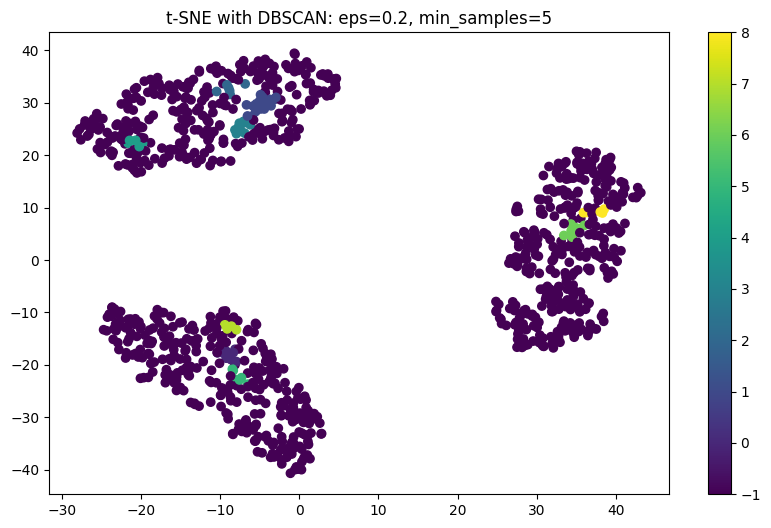

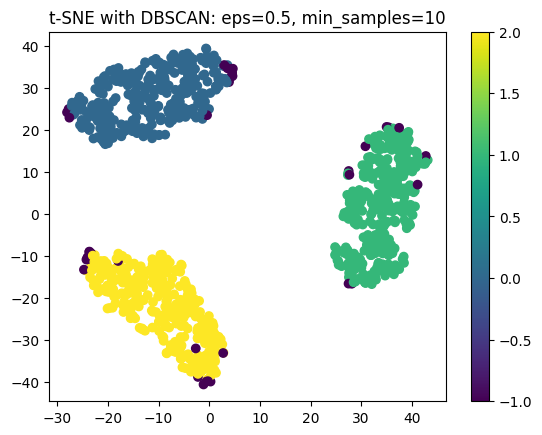

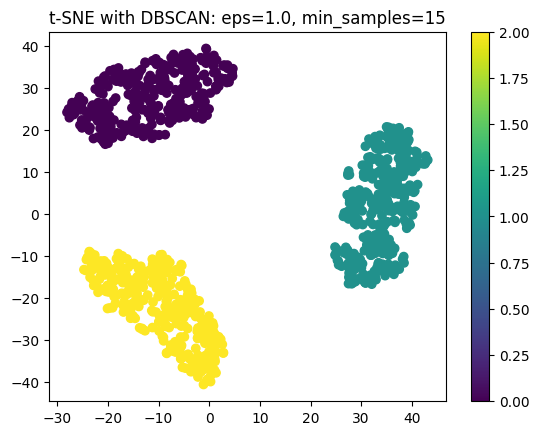

In [10]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data with 5 dimensions
n_samples = 1000
n_features = 5
n_clusters = 3

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Define different parameter values for DBSCAN
params = [
    {'eps': 0.2, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 10},
    {'eps': 1.0, 'min_samples': 15}
]

# Apply DBSCAN with different parameter values and store the labels
dbscan_results = {}
for param in params:
    dbscan = DBSCAN(eps=param['eps'], min_samples=param['min_samples'])
    dbscan_labels = dbscan.fit_predict(X_scaled)

    # Store the results
    dbscan_results[f"eps={param['eps']}, min_samples={param['min_samples']}"] = dbscan_labels

    # Count the number of samples in each cluster
    unique_labels, counts = np.unique(dbscan_labels, return_counts=True)

    # Print the count of samples in each cluster
    print(f"DBSCAN with eps={param['eps']}, min_samples={param['min_samples']}")
    for label, count in zip(unique_labels, counts):
        print(f"Cluster {label}: {count} samples")
    print("-" * 50)

# Optionally, visualize the results with t-SNE
X_tsne = TSNE(n_components=2).fit_transform(X_scaled)
plt.figure(figsize=(10, 6))

# Visualize each DBSCAN result
for param in params:
    dbscan_labels = dbscan_results[f"eps={param['eps']}, min_samples={param['min_samples']}"]
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis')
    plt.title(f't-SNE with DBSCAN: eps={param["eps"]}, min_samples={param["min_samples"]}')
    plt.colorbar()
    plt.show()


In [11]:
# Calculate Clustering Evaluation Metrics

from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Function to compute the Dunn Index (based on DBSCAN's labels)
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    if len(unique_labels) == 1:
        return 0  # No clusters
    inter_cluster_distances = []
    intra_cluster_distances = []
    for i in range(len(unique_labels)):
        for j in range(i+1, len(unique_labels)):
            # Calculate the distance between clusters i and j
            points_i = X[labels == unique_labels[i]]
            points_j = X[labels == unique_labels[j]]
            inter_cluster_distances.append(np.min(np.linalg.norm(points_i[:, None] - points_j, axis=2)))
        # Calculate intra-cluster distances for cluster i
        points_i = X[labels == unique_labels[i]]
        intra_cluster_distances.append(np.mean(np.linalg.norm(points_i[:, None] - points_i, axis=2)))
    dunn = np.min(inter_cluster_distances) / np.max(intra_cluster_distances)
    return dunn

# Compute metrics for each DBSCAN result
metrics = {}
for param, labels in dbscan_results.items():
    # Evaluate only if DBSCAN has produced valid clusters (no -1 for noise)
    if len(np.unique(labels)) > 1:
        silhouette = silhouette_score(X_scaled, labels)
        davies_bouldin = davies_bouldin_score(X_scaled, labels)
        dunn = dunn_index(X_scaled, labels)
        metrics[param] = {'Silhouette Score': silhouette, 'Davies-Bouldin Score': davies_bouldin, 'Dunn Index': dunn}
    else:
        metrics[param] = {'Silhouette Score': None, 'Davies-Bouldin Score': None, 'Dunn Index': None}

# Display results
metrics


{'eps=0.2, min_samples=5': {'Silhouette Score': -0.6731778921141202,
  'Davies-Bouldin Score': 1.1584733786508488,
  'Dunn Index': 0.04806794000734723},
 'eps=0.5, min_samples=10': {'Silhouette Score': 0.6483675243825333,
  'Davies-Bouldin Score': 1.6879645984922451,
  'Dunn Index': 0.0868345798263308},
 'eps=1.0, min_samples=15': {'Silhouette Score': 0.70443242950793,
  'Davies-Bouldin Score': 0.4272931728617187,
  'Dunn Index': 1.5190899812913843}}

# t-SNE

In t-SNE, the `perplexity` parameter controls the balance between local and global aspects of the data. It influences the number of nearest neighbors that are considered when performing the dimensionality reduction.

The default value for `perplexity` is 30, but you can change it to any other value.

To change the `perplexity` in the `TSNE` class from `sklearn.manifold`, you can pass the desired value for the `perplexity` parameter when initializing the t-SNE model.


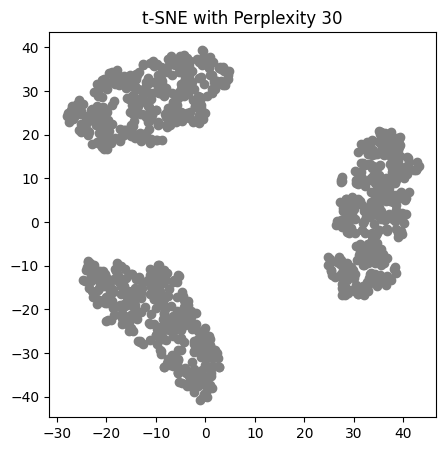

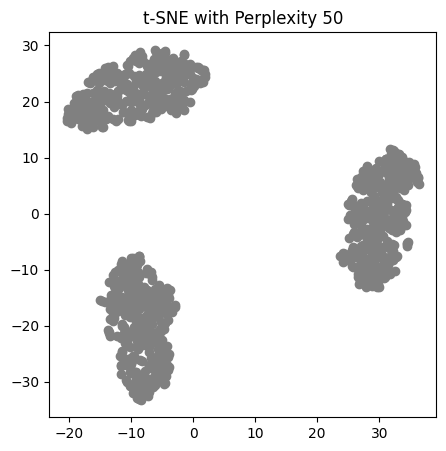

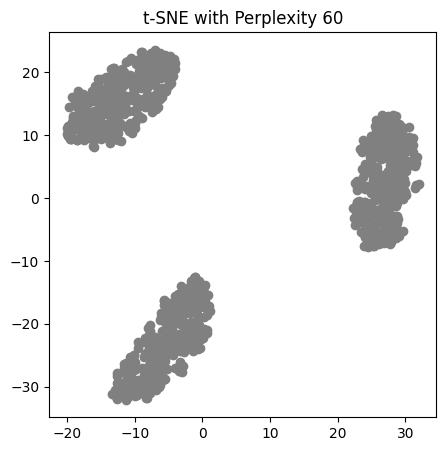

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize t-SNE with different perplexity values
perplexities = [30, 50, 60]
for perplexity in perplexities:
    tsne = TSNE(perplexity=perplexity)  # Set the value of perplexity
    X_tsne = tsne.fit_transform(X_scaled)  # Fit and transform the data

    # Visualize the 2D t-SNE projection
    plt.figure(figsize=(5, 5))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='gray')
    plt.title(f't-SNE with Perplexity {perplexity}')
    plt.show()



# Lab Exercise: Comparing Clustering Algorithms on the Digits Dataset

### Objective:
In this lab, you will compare different clustering algorithms—K-Means, DBSCAN, and Hierarchical Clustering—on the **Digits** dataset. You will evaluate the performance of these algorithms using clustering evaluation metrics such as **Silhouette Score**, **Dunn Index**, and **Davies-Bouldin Index**.

### Tasks:

1. **Data Preprocessing**:
   - Load the **Digits** dataset from `sklearn.datasets`.
   - Preprocess the data as needed (scaling, reshaping, etc.).

2. **Clustering**:
   - Apply the following clustering algorithms:
     - **K-Means**
     - **DBSCAN**
     - **Hierarchical Clustering**

3. **Evaluation**:
   - For each algorithm, compute the clustering evaluation metrics:
     - **Silhouette Score**
     - **Dunn Index**
     - **Davies-Bouldin Index**

4. **Comparison**:
   - Compare the clustering results and discuss which algorithm performs best on the Digits dataset based on the evaluation metrics.

# Discussions

1. **Which algorithm performed best based on the silhouette score, Davies-Bouldin score, and Dunn index?**

2. **How did the DBSCAN algorithm perform, given its sensitivity to parameters like eps and min_samples?**

3. **How does K-Means compare with Hierarchical Clustering, especially in terms of cluster structure?**
